In [4]:
import handcalcs.render
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
y, x = symbols('y x')

In [6]:
%%render sympy
y = x**2


<IPython.core.display.Latex object>

In [7]:
y

f_x = diff(x**2,x)

In [8]:
%%render 
f_x


<IPython.core.display.Latex object>

In [9]:
# Constants 
r = 1.8 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
x[0] = x0 # pass initial value to vector
for i in range(0,len(x)-1):
     x[i+1] = x0 + r*x[i]*(1-x[i]/K)
print(x) 


[ 1.          2.782       5.86828857 10.94305683 18.54199342 28.1870888
 37.43554429 43.15842015 45.15747013 45.57789828]


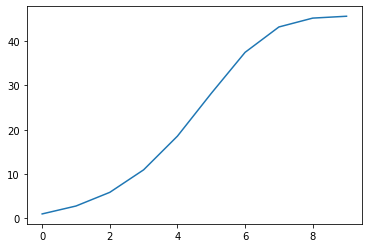

In [10]:
plt.plot(x)

# What does this look like if time is continuous

Use the previous code but modify it slightly

To make time continuous we will usse a simple numerical technique called Euler's method

Discrete-time dynamics $ x_{t+1} - x_{t} = r x_{t} (1 - \frac{x_t}{K})$ This is called a difference equation


Continuous-time dynamics $\frac{dx}{dt} = r x(t)(1-\frac{x(t)}{K})$ This is called a differential equation

[ 9.9 10.9 11.9 12.9 13.9 14.9 15.9 16.9 17.9] [ 1.          2.9602      6.68769288 13.35607222 23.91300663 37.02548178
 47.16690516 50.34107676 50.4976966 ]


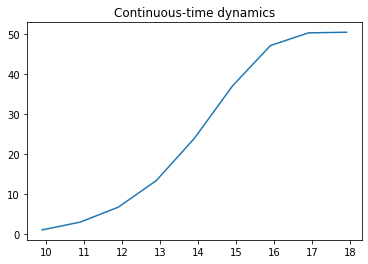

In [38]:
# Constants 
r = 0.2 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
x0 = 1 #initial value
n = 10 # note this should be (b - x0)/h so h = (b - x0)/n
#initialize values
x = np.zeros(n)  # vector of zeroes
t = np.zeros(n)
x[0] = x0 # pass initial value to vector
t[0] = 1
b = 100 # upper bound on the interval for x

h = (b - x0)/n

for i in range(0,n-1):
     t[i] = i + h #tiemstep + or * can be used
     x[i+1] = x0 + h*(r*x[i]*(1-x[i]/K))
print(t[0:n - 1],x[0:n - 1]) #print values
plt.plot(t[0:n - 1],x[0:n - 1])
plt.title('Continuous-time dynamics')
plt.show()

# Analytical solution



We can solve these exactly without using numbers, we will use the Python SymPy module to do this.

We first define an unknow function for the stock $x(t)$ let's call this $f$ (for fish or for function, so as not to consude it with x above or further below) as a function of time that we wish to solve for.



In [54]:
f, t, r, K = symbols('f t r K')
f = Function('f')
ode = Eq(diff(f(t), t), r*f(t)*(1 - f(t)/K)) #ode = ordinary differential equation
ode

Eq(Derivative(f(t), t), r*(1 - f(t)/K)*f(t))

In [55]:
sol = dsolve(ode, f(t)) 
sol

Eq(f(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))

This is the solution! It gives us a formula for the stock of fish $f(t) = x(t)$ at every point in time. to calculate the stock at a point in time subsitute in the time $t$, the growth rate of the stock and the carrying capcity $K$.
We will see later that the carrying capacity of the stock $K$ is jus tthe unfished biomass in steady-state (when the stock is constant through time). 

To calculate the stock (quantity of fish) we also need to know $C_1$. How do we find this number?





From the earlier simulations we saw that we had to choose an initial value $ x_0 $ so using the solution 

$ x(t) = \frac{K e^{C_{1} K} + r t}{e^{C_{1} K + r t} - 1} $ 

then when $ t = 0 $ we have 

$ x(0) = \frac{
K e^{C_{1} K}}{e^{C_{1} K} - 1} $

rearranging


$ x(0) \left[e^{C_{1} K} - 1\right] = K e^{C_{1} K}  $

or 


$ x(0) C_1 K  - x(0) = C_1 K $

$ = (x(0) - 1) C_1 K - x(0) = 0 $

$  C_1 = \frac{x(0)}{K (x(0) - 1)} $

So we actually know $ C_1 $ as long as we know the inital value $ x(0) $

## Add fishing

Use the following catch equation to modify the computer code above to incorporate fishing into our model:

$Y = q X E$

where$$Y$$is catch, $$q$$ is the catchability and $$X$$ is the stock and $$E$$ fishing effort.

Produce a graph and vary fishing effort to see how the graph changes. Assume fishing effort is some cosntant.


In [42]:
# Constants 
r = 0.8 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
q = 0.01 #catchability
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
E = np.zeros(10)

x[0] = x0 # pass initial value to vector

for i in range(0,len(x)-1):
     E[i] = 160
     x[i+1] = x0 + r*x[i]*(1-x[i]/K) - q*x[i]*E[i]
print(x) 


[1.         0.192      0.84610509 0.31738878 0.74528309 0.39932995
 0.67926032 0.45290058 0.63603858 0.48793277]


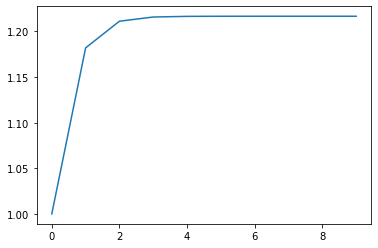

In [41]:
plt.plot(x)